In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# It shows the Unnamed column as a variable. I want to see the  observations

In [4]:
df.index = df.iloc[:,0]

In [5]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [6]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [7]:
df = df.iloc[:,1:5] # I need to remove column 0.

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
df.index.name = None

In [10]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [14]:
# Since Murder is a serious crime, it may be important to increase its weight or add a new variable.
# States with a median of more than 7 can be given more weight.

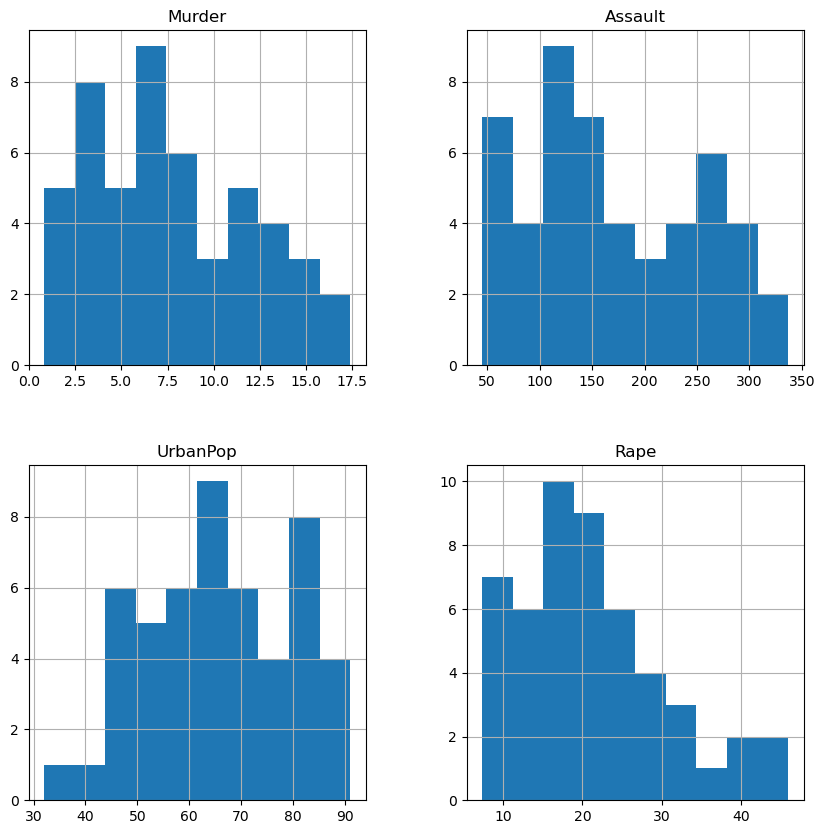

In [15]:
df.hist(figsize = (10,10));
# I can look at the distributions and make a basic segmentation.
# For example, which states make up the 2-peaked structure in murder?
# It's important to examine the details.


## K-MEANS Model and Visualization

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans
# I gave the n_clusters argument 4 to start with, I can also have given any other number.

KMeans(n_clusters=4)

In [17]:
k_fit = kmeans.fit(df)

In [18]:
k_fit.n_clusters

4

In [19]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [20]:
k_fit.labels_  # Which observation took what values?

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0])

In [21]:
## Visualization

In [22]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [23]:
clusters = k_fit.labels_

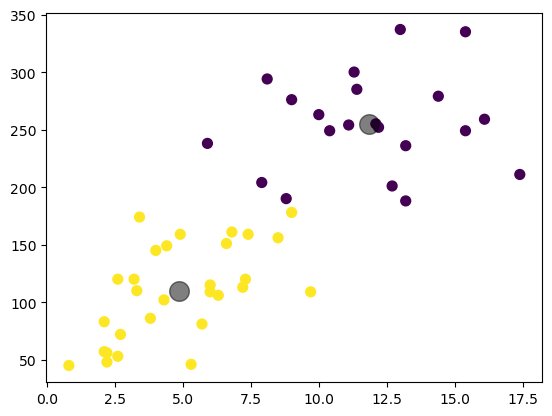

In [24]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);

In [25]:
# I have visualized it in two dimensions. I can also visualize it after applying PCA.

In [26]:
#pip install --upgrade matplotlib
import mpl_toolkits

In [27]:
from mpl_toolkits.mplot3d import Axes3D

In [28]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [29]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=clusters)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

<Figure size 1600x900 with 0 Axes>

In [31]:
# clusters and observation units

In [32]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [33]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,0
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,0


In [34]:
df["cluster_number"] = clusters

In [35]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_number
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0


In [36]:
df["cluster_number"] = df["cluster_number"] + 1

In [37]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_number
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,1


# Determination of the Optimum Number of Clusters

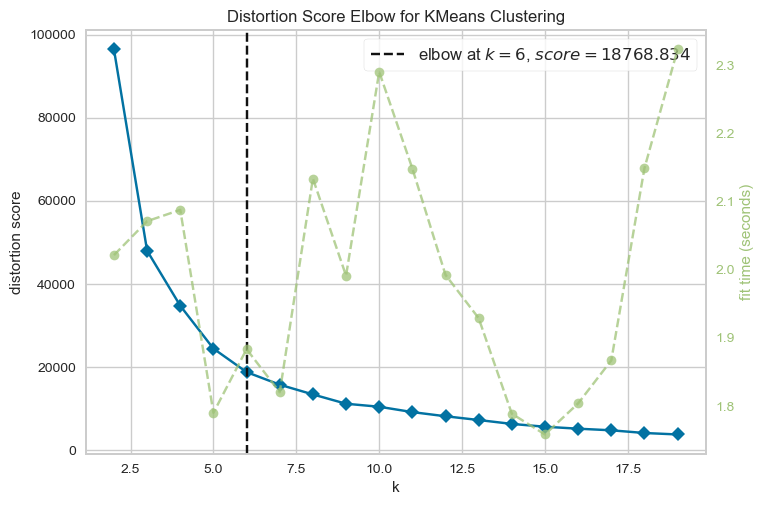

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
!pip install yellowbrick
import yellowbrick.cluster
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df) 
visualizer.poof()  

In [40]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [41]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,0
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,0


# Hierarchical Clustering

In [42]:
# The aim is to divide observations into subsets according to their similarity to each other.
# There are combining and partitioning techniques.
# Clustering can be done over variables since there is no dependent variable.

In [43]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
# df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [44]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [45]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

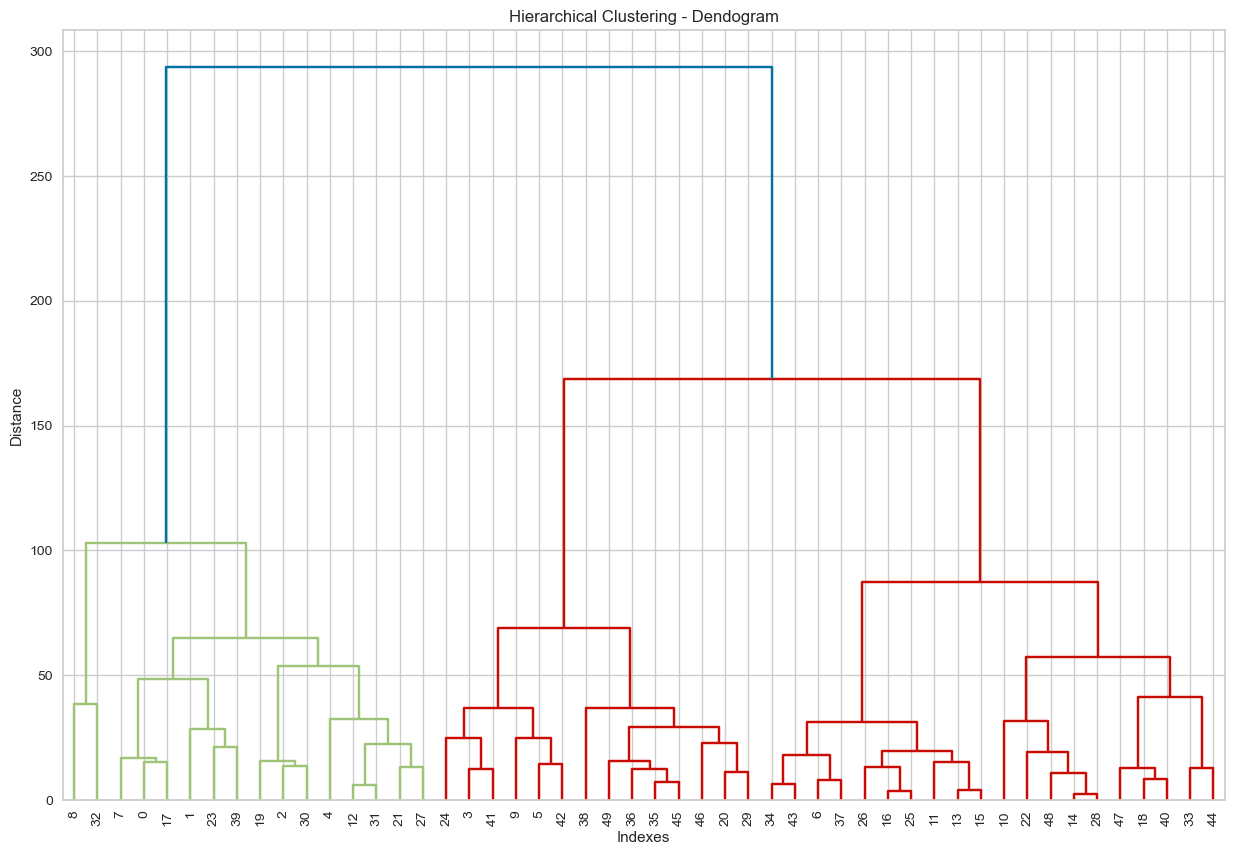

In [46]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

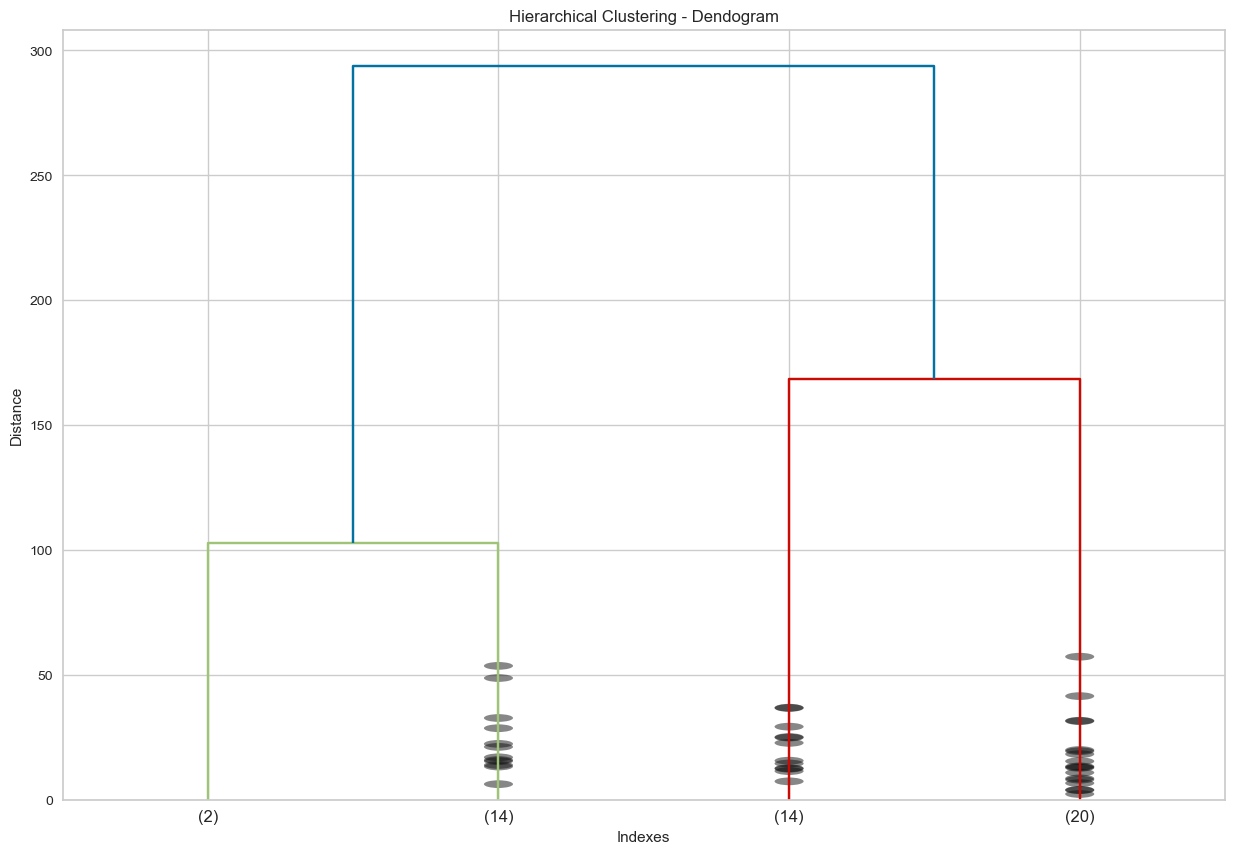

In [47]:
# I divided into 4 clusters (p = 4 arguments).
# Clusters with 50 observations in total are shown separately below.
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimal Number of Clusters

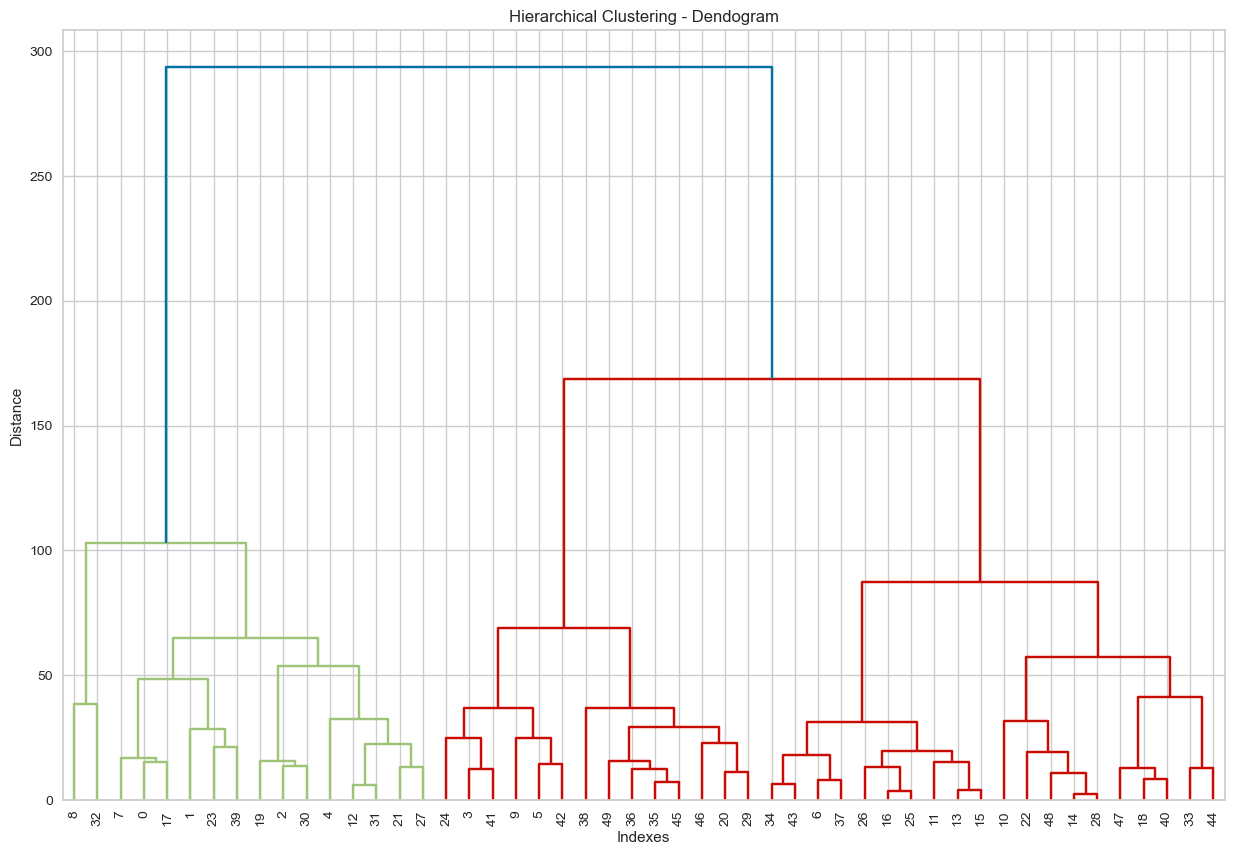

In [48]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [49]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [50]:
pd.DataFrame({"States" : df.index, "Clusters": cluster.fit_predict(df)})[0:10]

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [51]:
df["cluster_number"] = cluster.fit_predict(df)

In [52]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_number
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA

In [53]:
# The basic idea is to represent the main features of multivariate data with fewer variables/components.
# Use it if causality is not important, otherwise USE Partial Least Squares.

In [54]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [55]:
from warnings import filterwarnings
filterwarnings('ignore')

In [56]:
# For PCA we first need to standardize the variables.


In [57]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5] # Reviewing observations.

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [58]:
# Applying PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [59]:
component_df = pd.DataFrame(data = pca_fit, 
                          columns = ["first_component","second_component",])

In [60]:
component_df.head()

,first_component,second_component
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [61]:
# How much of the actual data set is represented.
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

In [62]:
# How many variables will I reduce it to?
pca = PCA().fit(df)

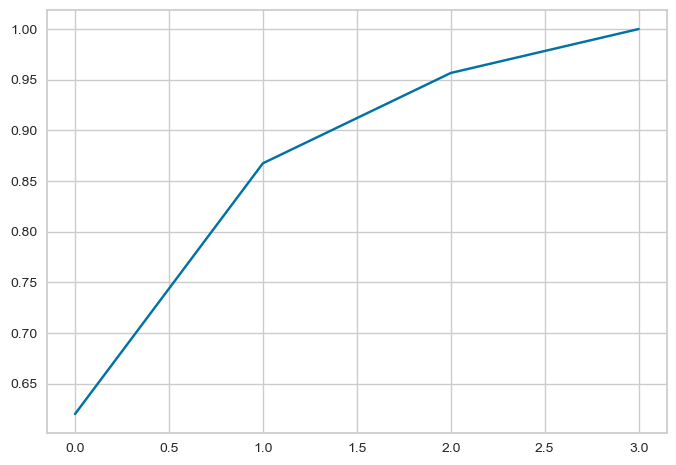

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))